## Zoning Board of Appeal Tracker Data

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
data = pd.read_csv("../data/zoning_data.csv")
# Display the first few rows of the data to get an overview
data.head()

,address,status,parent_apno,boa_apno,appeal_type,contact,submitted_date,received_date,hearing_date,ever_deferred,num_deferrals,final_decision_date,decision,closed_date,city,zip,ward,zoning_district,project_description
0,27 Hopkins Rd Jamaica Plain 02130,Appeal Submitted,NaN,BOA1534017,Zoning,Anthony Ross,2023-10-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jamaica Plain,2130,19,Jamaica Plain Neighborhood,NaN
1,3927 Washington ST Roslindale 02131,Appeal Submitted,NaN,BOA1534015,Zoning,Anthony Ross,2023-10-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Roslindale,2131,19,Jamaica Plain Neighborhood,NaN
2,206 Byron ST East Boston 02128,Community Process,ALT1486864,BOA1533753,Zoning,Marc LaCasse,2023-10-06,2023-10-06,NaN,NaN,NaN,NaN,NaN,NaN,East Boston,2128,1,East Boston Neighborhood,Change Occupancy 2 family to 3 Extend living s...
3,152 Washington ST Brighton 02135,Community Process,ALT1527237,BOA1533784,Zoning,Tinh Le,2023-10-06,2023-10-06,NaN,NaN,NaN,NaN,NaN,NaN,Brighton,2135,21,Allston/Brighton Neighborhood,change Occupancy from 2 family to 3 add bathro...
4,29 Orange St Roslindale 02131,Community Process,ERT1515294,BOA1533227,Zoning,Ivan Hernandez,2023-10-05,2023-10-05,NaN,NaN,NaN,NaN,NaN,NaN,Roslindale,2131,20,Roslindale Neighborhood,Building new 2 family duplex home Market rate ...


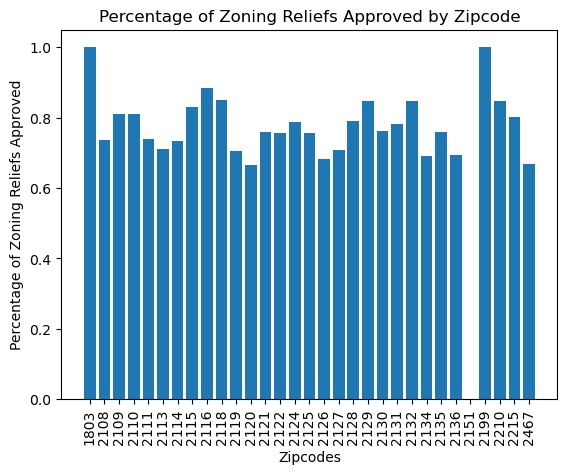

In [94]:
zipcodes = {}
zipcodes_approved = {}
x_zip = []
for i in range(len(data)):
    if (data['zip'][i] not in zipcodes_approved) and ((data['decision'][i] == 'AppProv') or (data['decision'][i] == 'Approved')):
        zipcodes_approved[data['zip'][i]] = 1
    elif (data['zip'][i] not in zipcodes_approved):
        zipcodes_approved[data['zip'][i]] = 0
    else:
        if ((data['decision'][i] == 'AppProv') or (data['decision'][i] == 'Approved')):
            count = zipcodes_approved[data['zip'][i]] + 1
            zipcodes_approved[data['zip'][i]] = count
        
    if (data['zip'][i] not in zipcodes):
        zipcodes[data['zip'][i]] = 1
        x_zip.append(data['zip'][i])
    else:
        count = zipcodes[data['zip'][i]] + 1
        zipcodes[data['zip'][i]] = count
sorted_x_zip = [str(value) for value in sorted(x_zip)]
approve = {}

for key in zipcodes:
    if key in zipcodes_approved:
        approve[key] = round(zipcodes_approved[key]/zipcodes[key], 3)
sorted_approve = {k: approve[k] for k in sorted(approve)}
y = [val for val in sorted_approve.values()]
plt.bar(sorted_x_zip, y)
plt.xticks(rotation=90)
plt.xlabel('Zipcodes')
plt.ylabel('Percentage of Zoning Reliefs Approved')
plt.title('Percentage of Zoning Reliefs Approved by Zipcode')
plt.show()